# Perceptron - démo de cours magistral -> Exo 4.3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# ## fonctions présentes dans le fichier mes_fonctions.py
# import sys
# sys.path.insert(0, '/home/flandes/Dropbox/Enseignement/mesModulesPython')
# import mes_fonctions

### Remarque: 
On a copié-collé le contenu du squelette fourni (les fonctions du fichier TP4-mes_fonctions.py) dans des cellules de ce jupyter-notebook, et on peut travailler directement ici. 

En fait, c'est beaucoup plus pratique pour faire tourner votre code (sinon vous pouvez aussi directement utiliser `ipython`)

Sinon, il faudra ajouter  `mes_fonctions.` devant les appels de fonctions, et re-import après chaque modif du fichier `mes_fonctions.py`
Par exemple, `make_blobs(100)` peut etre remplacé par `mes_fonctions.make_blobs(100)`

In [5]:
#################
## squelette fourni dans TP4-mes_fonctions.py :
#################
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def make_blobs(N):
    # data set 3
    N1=N//4
    N2=N-N1
    D=2
    np.random.seed(42)

    # parameters for the 1st blob of points
    mu1=(0.3,0.3)
    sigma1=((1, 0.3))
    X1 = np.random.normal( mu1, sigma1,(N1,D))

    # parameters for the 2nd blob of points
    mu2=(-2,-2)
    sigma2=((2, 0.5))
    X2 = np.random.normal( mu2, sigma2,(N2,D))

    # the two blobs are merged, and labels  +1/-1  are assigned
    Xraw = np.concatenate( (X1, X2) )
    Y = np.concatenate( (np.ones(N1), -np.ones(N2)) ) # .reshape(N,1)
    X = Xraw.copy() # then X will be the extended vector, with the ones added

    X =  np.hstack((np.ones((N,1)), X))  # extended vector

    return X,Y


def display(X, Y, wInit, iteration):
    # TODO : cette fonction devrait etre obtenue en faisant le TD2/3,
    # dans lequel on calcule la distance plan-droite,
    # et on apprend a maitriser la relation géométrie / vecteurs
    def norme(wprime):
        return np.linalg.norm(wprime)
    
    w=wInit.copy()
    w0= w[0] # c'est la partie qui caractérise la distance à l'origine, qui détermine l'ordonnée à l'origine (mais ce n'est pas égal à ça)
    ## on normalise les composantes du vrai vecteur w
    wprime = w[1:] # /(w[1]**2+w[2]**2)**0.5
    print(w, w0, wprime)

    u_w = (wprime/norme(wprime)) # vecteur unitaire donnant la direction
    distance_origine_droite = -w0/norme(wprime)
    projete_de_Origine_sur_droite = u_w * distance_origine_droite
    print("projete_de_Origine_sur_droite", projete_de_Origine_sur_droite)

    vecteur_Orthogonal_A_La_Droite = np.array([wprime[1],-wprime[0]])
    extremite1 = projete_de_Origine_sur_droite + vecteur_Orthogonal_A_La_Droite*10
    extremite2 = projete_de_Origine_sur_droite - vecteur_Orthogonal_A_La_Droite*10
    extremites_abscisses = np.array([extremite1[0], extremite2[0]])
    extremites_ordonnees = np.array([extremite1[1], extremite2[1]])

    plt.figure(1)
    Class1 = X[Y==-1,1:] # points of class "-1"
    Class2 = X[Y== 1,1:] # points of class "+1"
    plt.plot(Class1[:,0], Class1[:,1], 'r+') # points of class "-1"
    plt.plot(Class2[:,0], Class2[:,1], 'bx') # points of class "+1"
    cmap = cm.jet
    colorGradient=cmap(np.linspace(0.0,1.0,12))
    plt.plot(extremites_abscisses, extremites_ordonnees,  color=colorGradient[iteration%(len(colorGradient))])
    print(extremites_abscisses)
    
    


## TODO: créer une fonction qui inialise les poids
## (soit aléatoirement, soit de façon pré-fixée (c'est moins bien))
def initializeWeights(X, type):
    pass
    return wparameters

## TODO: remplir cette fonction (au moins, sans les affichages
## mais de sorte que le résultat soit correct)
def perceptronFullBatch_version_minimale(X,Y,eta, w0, maxIter=20, plot=None, verbose=None, Loss=None):
    pass
    return wparameters


## TODO-BONUS: faire aussi une version avec l'affichage
## des positions intermédiaires de la droite séparatrice,
## en couleurs, comme vu en cours.
# def perceptronFullBatch_version_decoree(X,Y,eta, w0, maxIter=20, plot=True, verbose=True, Loss="ReLU"):
#     for iteration in range(maxIter):

#         pass ## TODO ici

#         if plot :
#             display(X,Y, wparameters, iteration)

#     ## TODO ici

#     return wparameters



In [6]:
N=100
X, Y = make_blobs(100)
## à vous de jouer !!

[1.   0.01 1.  ] 1.0 [0.01 1.  ]
projete_de_Origine_sur_droite [-0.009999   -0.99990001]
[  9.990001 -10.009999]


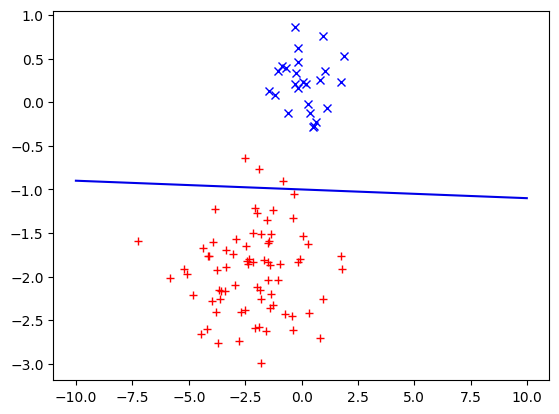

In [7]:
w0 = np.array([1,0.01,1])  ## w initial
display(X,Y, w0, 1)


### Remarque: les données sont déja augmentées:  (on a mis "le 1")

In [8]:
X[:10]

array([[ 1.        ,  0.79671415,  0.25852071],
       [ 1.        ,  0.94768854,  0.75690896],
       [ 1.        ,  0.06584663,  0.22975891],
       [ 1.        ,  1.87921282,  0.53023042],
       [ 1.        , -0.16947439,  0.46276801],
       [ 1.        , -0.16341769,  0.16028107],
       [ 1.        ,  0.54196227, -0.27398407],
       [ 1.        , -1.42491783,  0.13131374],
       [ 1.        , -0.71283112,  0.3942742 ],
       [ 1.        , -0.60802408, -0.12369111]])

## 1. Initialization

- make a stupid or random guess for an initial value of the parameters vector `wparameters`, i.e set a value for $\vec w_0=$ `w0`, the initial value of $\vec w$
- choose some values for the hyper-parameters `eta`, `MaxIter`


### Initialization of weights

It's independent of the rest, we just need to know the dimensionality of parameters to be initalized

In [7]:


## TODO: créer une fonction qui inialise les poids
## (soit aléatoirement, soit de façon pré-fixée (c'est moins bien))
def initializeWeights(X, type):  # on ne regarde X que pour produire un w de la bonne dimension D.
    D= X.shape[1]
    pass
    return wparameters


SyntaxError: invalid syntax (3149403198.py, line 4)

In [8]:
######### initialization of the separating vector ######
np.random.seed(43)
w0 = initializeWeights(X,"random")  ## w initial
print(w0)
display(X,Y, w0, 0)

NameError: name 'wparameters' is not defined

In [ ]:
plotting = True
verbose = True

In [ ]:

## TODO: remplir cette fonction (au moins, sans les affichages
## mais de sorte que le résultat soit correct)
def perceptronFullBatch_version_minimale(X,Y,eta, w0, maxIter=20, plot=None, verbose=None, Loss=None):
    pass
    return wparameters

In [ ]:
### hyper-parameters ###
MAXITER=85
eta = 0.05
## on lance le calcul
w =  perceptronFullBatch_version_minimale(X,Y,eta, w0, MAXITER, plotting, verbose)

In [ ]:
display(X,Y, w, 0)

## Quand votre code "minimaliste" converge / si il compile sans converger, et que vous voulez comprendre pourquoi:

Faites une version plus avancée `perceptronFullBatch_version_decoree`, dans laquelle vous réalisez:
- un découpage (*split*) des données (train/validation) à partir de vos données d'entrainement. Vous pouvez utiliser `sklearn.model_selection.train_test_split`
- un calcul du taux d'erreur (sur l'ensemble d'entrainement)
- un calcul du taux d'erreur (sur l'ensemble de validation)
- un calcul de la fonction cout (sur l'ensemble d'entrainement)
- un calcul de la fonction cout (sur l'ensemble de validation)
- un affichage de l'hyperplan de séparation, à l'aide de la fonction display, qui est fournie

In [ ]:
### hyper-parameters ###
MAXITER=85
eta = 0.05
## on lance le calcul
w, err_train, err_val, loss_train, loss_val =  mes_fonctions.perceptronFullBatch_version_decoree(X,Y,eta, w0, MAXITER, plotting, verbose)

In [ ]:
plt.plot(err_train, label = 'err_train')
plt.plot(err_val, label = 'err_val')
plt.plot(loss_train, label = 'loss_train')
plt.plot(loss_val, label = 'loss_val')
plt.semilogy()
plt.legend()

# On teste sur des "vraies" données (en fait, c'est encore un très petit jeu de données)

In [ ]:
import sklearn.datasets
import sklearn.model_selection

## Load_digits (minim-MNIST, en taille 8x8, avec seulement ~2000 exemples)

Remarque: Le MNIST complet en contient 70000, chacun de taille 28x28. Allez voir https://gitlab.inria.fr/flandes/data-for-teaching/-/blob/master/import-mnist70-numpy-npz.py si vous voulez charger mon fichier https://gitlab.inria.fr/flandes/data-for-teaching/-/blob/master/mnist70.npz

In [ ]:

X, Y = sklearn.datasets.load_digits(n_class=2, return_X_y=True)

## on fait immédiatement l'astuce du 1 (augmentation de toutes les données par ajout d'une colonne de 1)
N = X.shape[0]
X =  np.hstack((np.ones((N,1)), X))  # extended vector
## on encode le label "Ground Truth" (vrai) dans les valeurs {-1,1} plutot que {0,1}
Y*=2
Y-=1
## on coupe et on réserve 20% des data pour le test final 
X, X_test, Y, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
## la premiere image est un zero:
plt.imshow(X[0,1:].reshape(8, 8), cmap=plt.cm.binary)

In [ ]:
## la 45ème image est un 1:
plt.imshow(X[44,1:].reshape(8, 8), cmap=plt.cm.binary)

In [ ]:
### hyper-parameters ###
MAXITER=200
eta = 0.001
## on lance le calcul
plotting=False
verbose=False

## on initialise w avec la bonne dimension (ceci pourrait/devrait etre fait dans la fonction de fit, en fait)
np.random.seed(12)
w0 = mes_fonctions.initializeWeights(X, "random")

w, err_train, err_val, loss_train, loss_val =  mes_fonctions.perceptronFullBatch_version_decoree(X,Y,eta, w0, MAXITER, plotting, verbose)

plt.plot(err_train, label = 'err_train')
plt.plot(err_val, label = 'err_val')
plt.plot(loss_train, label = 'loss_train')
plt.plot(loss_val, label = 'loss_val')
plt.semilogy()
plt.legend()

### À tester: essayer de varier la graine, c.a.d. 
`np.random.seed(12)` : rempalcer par `np.random.seed(1) `  (essayer plein de valeurs)

Et à chaque fois, observer le comportement des courbes. Intéressant, non?

# Encore un test: sur le dataset des vins

In [ ]:
import sklearn.datasets
X, Y = sklearn.datasets.load_wine(return_X_y=True)

## on filtre les vins qui ne sont pas d'une des deux premières classes
filtre = Y<2
X = X[filtre]
Y = Y[filtre]
## on fait immédiatement l'astuce du 1 (augmentation de toutes les données par ajout d'une colonne de 1)
N = X.shape[0]
X =  np.hstack((np.ones((N,1)), X))  # extended vector
## on encode le label "Ground Truth" (vrai) dans les valeurs {-1,1} plutot que {0,1}
Y*=2
Y-=1
## on coupe et on réserve 20% des data pour le test final 
X, X_test, Y, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X.shape, Y.shape, X_test.shape

In [ ]:
### hyper-parameters ###
MAXITER=200
eta = 0.001
## on lance le calcul
plotting=False
verbose=False

## on initialise w avec la bonne dimension (ceci pourrait/devrait etre fait dans la fonction de fit, en fait)
np.random.seed(1)
w0 = mes_fonctions.initializeWeights(X, "random")

w, err_train, err_val, loss_train, loss_val =  mes_fonctions.perceptronFullBatch_version_decoree(X,Y,eta, w0, MAXITER, plotting, verbose)

plt.plot(err_train, label = 'err_train')
plt.plot(err_val, label = 'err_val')
plt.plot(loss_train, label = 'loss_train')
plt.plot(loss_val, label = 'loss_val')
plt.semilogy()
plt.legend()

# TODO (à la maison - lors de votre projet): améliorer le choix des hyper-paramètres, et seulement à la fin de ce choix, tester sur le test set/
